### Activity 2.02: Text Visualization

In this activity, you will create a word cloud for the 50 most frequent words in a dataset. The dataset we will use consists of random sentences that are not clean. First, we need to clean them and create a unique set of frequently occurring words.

#### -Fetch the dataset.

In [1]:
# string to lowercase: word.lower()
with open('text_corpus.txt') as f:
    text = f.read()
text = text.lower()
print(text.lower())

new zealand players jesse tashkoff and joey field won hearts on wednesday after they helped carry injured west indies batsman kirk mckenzie off the field during their u-19 world cup quarterfinal.

mckenzie was suffering from cramps on his leg and was forced to retire hurt on 99, but courageously decided to return to face the final 14 deliveries of the innings after west indies had lost their ninth wicket.

after struggling to hobble back to the middle, however, he was dismissed first ball -- still one short of his century.

cue the intervention of the sportsmanlike kiwi duo, who carried the badly-cramped mckenzie off the field while being applauded back to the pavilion by the fans at benoni's willowmoore park in south africa.

the gesture was applauded by the cricketing fraternity with india vice-captain rohit sharma also praising the new zealand players.

"so good to see this #spiritofcricket at its best," rohit tweeted along with the video of the incident.

@imro45
 so good to see th

#### -Perform the preprocessing steps, such as text cleaning, tokenization, and lemmatization, on the fetched data.

In [2]:
# re python library used for string searching and string manipulation.
import re
def clean_text(sentence):
    return re.sub(r'([^\s\w]|_)+', ' ', sentence).split()
text_after_clean = clean_text(text)

In [3]:
# remove stop words
from nltk import download
download('stopwords')
from nltk.corpus import stopwords

# English stopwords
stop_words = stopwords.words('english') # arabic, danish, dutch, etc.

# Remove stop words
def remove_stop_words(sentence_words, stop_words):
    return ' '.join([word for word in sentence_words if word not in stop_words])
words_no_stop = remove_stop_words(text_after_clean, stop_words)
print(words_no_stop)

new zealand players jesse tashkoff joey field hearts wednesday helped carry injured west indies batsman kirk mckenzie field u 19 world cup quarterfinal mckenzie suffering cramps leg forced retire hurt 99 courageously decided return face final 14 deliveries innings west indies lost ninth wicket struggling hobble back middle however dismissed first ball still one short century cue intervention sportsmanlike kiwi duo carried badly cramped mckenzie field applauded back pavilion fans benoni willowmoore park south africa gesture applauded cricketing fraternity india vice captain rohit sharma also praising new zealand players good see spiritofcricket best rohit tweeted along video incident imro45 good see spiritofcricket best https twitter com cricketworldcup status 1222568945204498433 outstanding show sportsmanship earlier today game west indies new zealand u19cwc spiritofcricket futurestars new zealand meanwhile rode kristian clarke joey field round performances make semi finals u 19 world 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# stemming using PorterStemmer
from nltk import word_tokenize
from nltk import stem
# get stems
def get_stems(tokens, stemmer):
    return [stemmer.stem(word) for word in tokens]
porterStem = stem.PorterStemmer()
tokens = word_tokenize(words_no_stop)
token_stems = get_stems(tokens, porterStem)
print(token_stems)

['new', 'zealand', 'player', 'jess', 'tashkoff', 'joey', 'field', 'heart', 'wednesday', 'help', 'carri', 'injur', 'west', 'indi', 'batsman', 'kirk', 'mckenzi', 'field', 'u', '19', 'world', 'cup', 'quarterfin', 'mckenzi', 'suffer', 'cramp', 'leg', 'forc', 'retir', 'hurt', '99', 'courag', 'decid', 'return', 'face', 'final', '14', 'deliveri', 'inning', 'west', 'indi', 'lost', 'ninth', 'wicket', 'struggl', 'hobbl', 'back', 'middl', 'howev', 'dismiss', 'first', 'ball', 'still', 'one', 'short', 'centuri', 'cue', 'intervent', 'sportsmanlik', 'kiwi', 'duo', 'carri', 'badli', 'cramp', 'mckenzi', 'field', 'applaud', 'back', 'pavilion', 'fan', 'benoni', 'willowmoor', 'park', 'south', 'africa', 'gestur', 'applaud', 'cricket', 'fratern', 'india', 'vice', 'captain', 'rohit', 'sharma', 'also', 'prais', 'new', 'zealand', 'player', 'good', 'see', 'spiritofcricket', 'best', 'rohit', 'tweet', 'along', 'video', 'incid', 'imro45', 'good', 'see', 'spiritofcricket', 'best', 'http', 'twitter', 'com', 'cricket

#### -Create a set of unique words along with their frequencies for the 50 most frequently occurring words.

In [15]:
from collections import Counter
Counter(token_stems).most_common(50)

[('field', 7),
 ('new', 5),
 ('zealand', 5),
 ('mckenzi', 4),
 ('wicket', 4),
 ('clark', 4),
 ('joey', 3),
 ('west', 3),
 ('indi', 3),
 ('final', 3),
 ('spiritofcricket', 3),
 ('2', 3),
 ('unbeaten', 3),
 ('player', 2),
 ('carri', 2),
 ('u', 2),
 ('19', 2),
 ('world', 2),
 ('cup', 2),
 ('cramp', 2),
 ('99', 2),
 ('face', 2),
 ('back', 2),
 ('ball', 2),
 ('kiwi', 2),
 ('applaud', 2),
 ('south', 2),
 ('africa', 2),
 ('rohit', 2),
 ('also', 2),
 ('good', 2),
 ('see', 2),
 ('best', 2),
 ('game', 2),
 ('kristian', 2),
 ('windi', 2),
 ('jess', 1),
 ('tashkoff', 1),
 ('heart', 1),
 ('wednesday', 1),
 ('help', 1),
 ('injur', 1),
 ('batsman', 1),
 ('kirk', 1),
 ('quarterfin', 1),
 ('suffer', 1),
 ('leg', 1),
 ('forc', 1),
 ('retir', 1),
 ('hurt', 1)]

#### -Create a word cloud for these top 50 words.

In [16]:
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
#from sklearn.datasets import fetch_20newsgroups
#from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/LNonyane/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# Generate word cloud
def generate_word_cloud(text, stopwords):
    # This method generates word cloud object with given
    # corpus, stopwords and dimensions
    wordcloud = WordCloud(width=800, height=800, colormap='coolwarm', max_words=50,
                         stopwords=stopwords, min_font_size=10).generate(text)
    return wordcloud

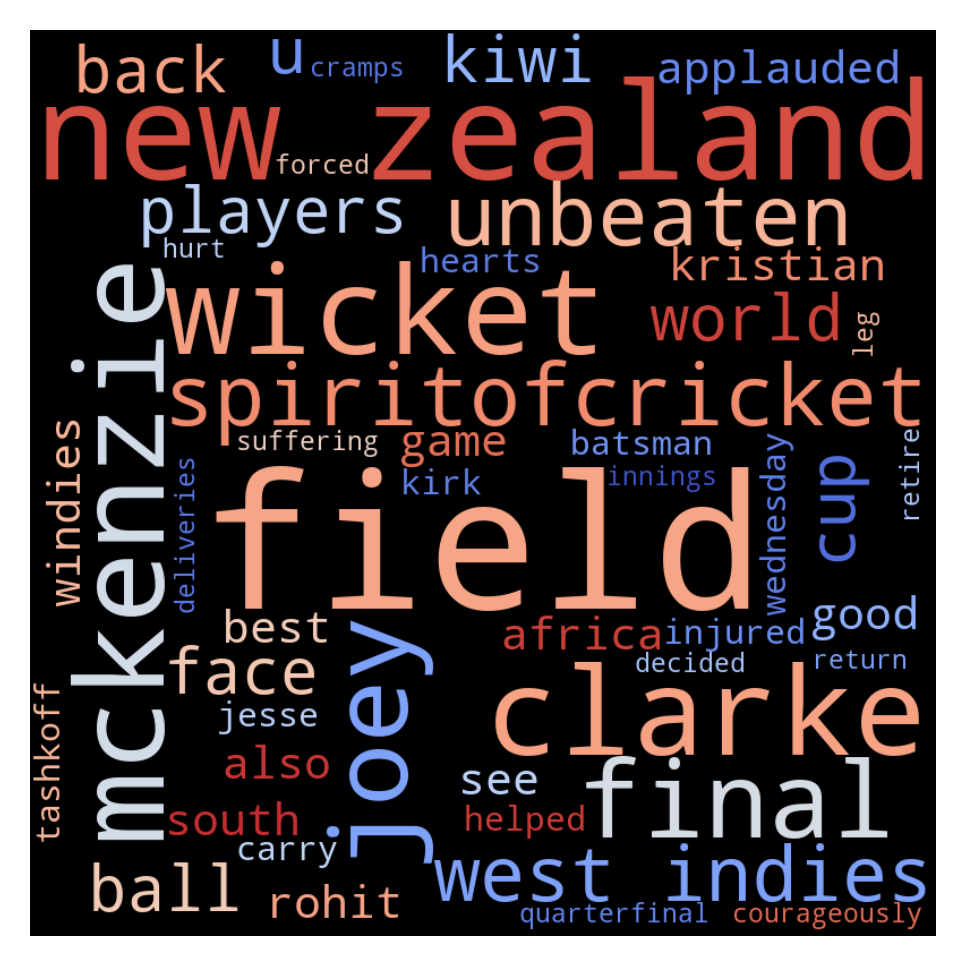

In [18]:
# generate a word cloud object, and finally plot the word cloud with matplotlib

#text = get_data(1000)
#stop_words = load_stop_words()
wordcloud = generate_word_cloud(words_no_stop, stop_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

So, in this exercise, we learned what word clouds are and how to generate word clouds with Python's wordcloud library and visualize this with matplotlib.

#### -Justify the word cloud by comparing it with the word frequency that you calculated.

The word cloud and the word frequency seem to be aligned.